# Avaliação Final - ECD - Estatística para Ciência de Dados

### Questão 2:<br>
Seja a variável aleatória com distribuição de probabilidade: P(X=0)=0,2; P(X=1)=0,1; P(X=2)=0,3; P(X = 4) = 0,4. Uma amostra com 100 observações é sorteada. Qual é a probabilidade de que a média amostral é maior do que 3? Calcule o valor teórico e compare com a simulação, conforme feito na aula.<br>

Anexe o arquivo notebook com a sua resposta. Atenção, se constatado plágio, a questão será zerada.<br>

Tamanho máximo para arquivos: 7.8Gb, número máximo de anexos: 1<br>

In [1]:
def esperanca(X, p_X):
    E = 0
    for i in range(0, len(X)):
        E += X[i]*p_X[i]
    return E

def desviopadrao(X, p_X):
    E = 0; E2 = 0
    for i in range(0, len(X)):
        E += X[i]*p_X[i]
        E2 += (X[i]**2)*p_X[i]
    DP = np.sqrt(E2-E**2)
    return DP
    
def z_calculado(X_test, E, DP, n):
    Zt = (X_test - E) / (DP / np.sqrt(n))
    return Zt


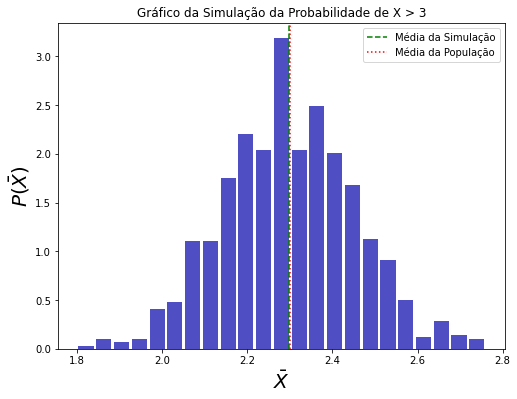

Média da Simulação: 2.298 
Média da População: 2.300

Probabilidade Simulada: 0.00000000 
Probabilidade Teórica: 0.00000326


In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Distribuição de probabilidades
X = [0,1,2,4]
p_X = [0.2,0.1,0.3,0.4]
# Amostras para simulação
n = 100
# Valor a ser testado
X_test = 3

E = esperanca(X, p_X)
DP = desviopadrao(X, p_X)
Zt = z_calculado(X_test, E, DP, n)

# Probabilidade teórica de X>3 ou z>Zt
p_teorica = 1 - scipy.stats.norm.cdf(Zt)

# Probabilidade simulada de X>3 ou z>Zt
n = 100      # número de amostras
ns = 1000    # número de simulacoes
vx = []      # armazena a media amostral
for s in range(0,ns):
    A = np.random.choice(X, n, p=p_X)
    vx.append(np.mean(A))

nmaior = 0
for i in range(0, len(vx)):
    if(vx[i] > X_test):
        nmaior = nmaior + 1
nmaior = nmaior/len(vx)

# Plotando os resultados num gráfico
plt.figure(figsize=(8,6))
plt.title('Gráfico da Simulação da Probabilidade de X > 3')
plt.hist(x=vx, bins='auto',color='#0504aa', alpha=0.7, rwidth=0.85, density = True)
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.axvline(x=np.mean(vx), color='green', linestyle='--', label = 'Média da Simulação')
plt.axvline(x=E, color='red', linestyle=':', label = 'Média da População')
plt.legend()
plt.show(True)

print("Média da Simulação: %.3f" % np.mean(vx),"\nMédia da População: %.3f" % E)
print()
print("Probabilidade Simulada: %.8f" % nmaior, "\nProbabilidade Teórica: %.8f" % p_teorica)